# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Logistic Regression From Scratch using Sigmoid Function</p>

In [1]:
import numpy as np

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate= learning_rate
        self.n_iterations= n_iterations
        self.weights= None
        self.bias= None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))# sigmoid function/formula

    def fit(self, X, y):
        n_samples, n_features= X.shape
        self.weights= np.zeros(n_features)
        self.bias= 0

        #Gradient descent
        for _ in range(self.n_iterations):
            #linear model
            linear_model= np.dot(X, self.weights) + self.bias
            #sigmoid function
            y_predicted= self.sigmoid(linear_model)

            #calc gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            #update vals
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Importing libraries</p>

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Dummy dataset </p>

In [4]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Using Logistic Regression class</p>

In [5]:
model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#model accuracy 
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Confusion Matrix for Logistic Regression class</p>

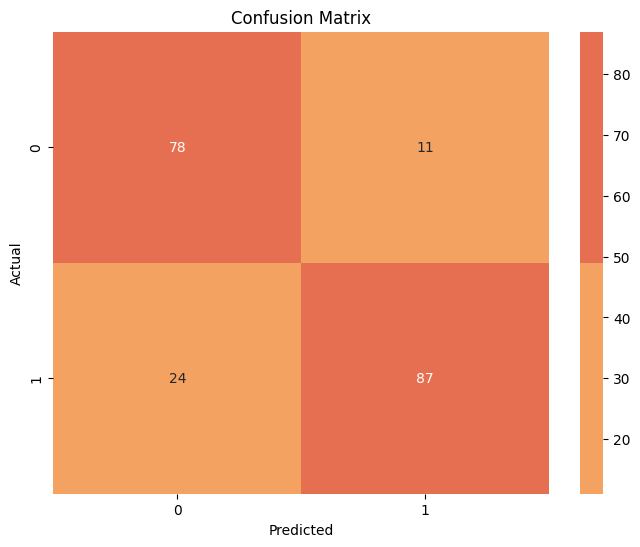

In [6]:
threshold = 0.5
y_pred = model.predict(X_test)
y_pred_class = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_class)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=['#F4A261','#E76F51'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Logistic Regression using sklearn </p>

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model= LogisticRegression(random_state=0).fit(X_train, y_train)
# model.fit(X_train, y_train)

predictions= model.predict(X_test)
accuracy= np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Confusion Matrix for sklearn </p>

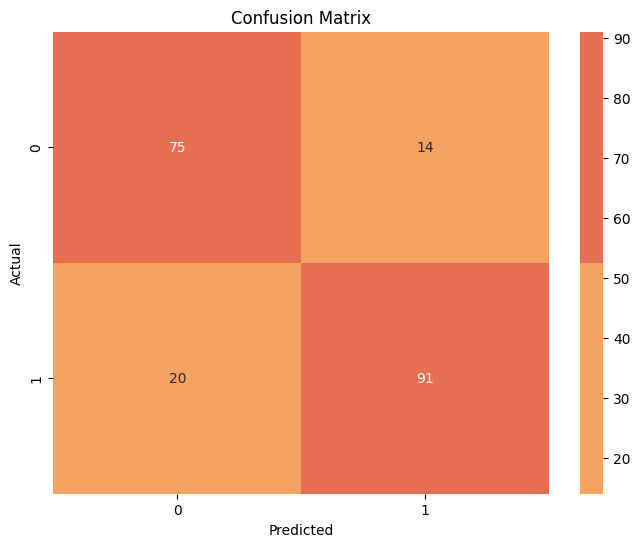

In [9]:
threshold = 0.5
y_pred = model.predict(X_test)
y_pred_class = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_class)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=['#F4A261','#E76F51'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Almost Same!</p>